# Telecomunicaciones


## Descomposición de tareas

### Definir objetivos
- **Identificar operadores ineficaces**, operadores con:
    - Muchas llamadas entrantes perdidas (internas y externas)
    - Mucho tiempo de espera para llamadas entrantes
    - Pocas llamadas salientes

### Preprocesamiento de datos
- Estudiar valores ausentes
- Estudiar valores duplicados
- Eliminar duplicados
- Reemplazar valores ausentes
- Convertir tipos
- Estudiar el tipo de correspondencia (dirección(?))
- Comprobar la exactitud de los nombres de columnas
- Renombrar las columnas

## Enriquecimiento de datos
- Calcular total de llamadas por operador
- Calcular porcentaje de llamadas perdidas por operador
- Calcular promedio de duración total y tiempo de espera
- Unir métricas por operador en un solo dataset

### Análisis exploratorio
- Organizar data set por operator_id
- Analizar las llamadas entrantes perdidas
      - Separar las llamadas entrantes perdidas internas de las externas
- Revisar los tiempos de espera para las Llamadas entrantes
- Identificar operadores con pocas llamadas salientes
- Graficar cada uno de los puntos pasados

### Conclusiones
- Identificar operadores con
      - Alto número de llamadas entrantes perdidas
      - Valores altos de tiempos de espera
      - Pocas llamadas salientes
- Analizar la relación entre Buenos operadores y malos operadores

## Preprocesamiento

In [1]:
# Cargar librerías

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar datasets
clients = pd.read_csv('datasets/telecom_clients.csv')
data = pd.read_csv('datasets/telecom_dataset_new.csv')

### Cients

In [3]:
clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [4]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [5]:
clients.describe()

,user_id
count,732.000000
mean,167431.927596
std,633.810383
min,166373.000000
25%,166900.750000
50%,167432.000000
75%,167973.000000
max,168606.000000


In [6]:
clients.user_id.nunique()

732

In [7]:
clients.tariff_plan.value_counts()

tariff_plan
C    395
B    261
A     76
Name: count, dtype: int64

In [8]:
clients.isnull().sum()

user_id        0
tariff_plan    0
date_start     0
dtype: int64

In [9]:
clients.duplicated().sum()

np.int64(0)

In [10]:
clients.date_start = pd.to_datetime(clients.date_start)
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


## Data

In [11]:
data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [13]:
data[['calls_count', 'call_duration', 'total_call_duration']].describe()

,calls_count,call_duration,total_call_duration
count,53902.000000,53902.000000,53902.000000
mean,16.451245,866.684427,1157.133297
std,62.917170,3731.791202,4403.468763
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,47.000000
50%,4.000000,38.000000,210.000000
75%,12.000000,572.000000,902.000000
max,4817.000000,144395.000000,166155.000000


In [14]:
# Valores ausentes
data.isnull().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

In [15]:
# Veremos las filas con operator_id ausente
operator_null = data[data['operator_id'].isnull()]
operator_null.sample(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
41435,167870,2019-10-20 00:00:00+03:00,in,False,NaN,True,1,0,35
1327,166405,2019-10-27 00:00:00+03:00,in,False,NaN,True,20,0,234
7092,166582,2019-10-10 00:00:00+03:00,in,False,NaN,True,69,0,943
41949,167908,2019-11-26 00:00:00+03:00,in,False,NaN,True,3,0,8
28578,167185,2019-09-17 00:00:00+03:00,in,False,NaN,True,9,0,20


In [16]:
# Veremos las filas con internal ausente
internal_null = data[data['internal'].isnull()]
internal_null.sample(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
37353,167626,2019-10-12 00:00:00+03:00,in,NaN,NaN,True,2,0,0
36640,167626,2019-09-30 00:00:00+03:00,in,NaN,NaN,True,1,0,31
36251,167599,2019-11-03 00:00:00+03:00,in,NaN,NaN,True,1,0,2
1924,166406,2019-09-02 00:00:00+03:00,in,NaN,879898.0,False,1,2,9
43100,167977,2019-11-14 00:00:00+03:00,in,NaN,944220.0,False,1,5,19


In [17]:
print(f'Porcentaje de nulos en Operator id: {(operator_null.shape[0] / data.shape[0]*100):.2f}%')
print(f'Porcentaje de nulos en Internal: {(internal_null.shape[0] / data.shape[0]*100):.2f}%')


Porcentaje de nulos en Operator id: 15.16%
Porcentaje de nulos en Internal: 0.22%


Dado que el porcentaje de valores nulos en internal es muy pequeño, lo borraremos. Esto no nos significará ningún cambio en los análisis.
Y también borraremos las filas faltantes en Operator id, ya que siendo nuestra tarea identificar operadores ineficientes, sin tener un operador responsable de los datos, ese dato no nos sirve de nada.

In [18]:
# Guardamos el tamaño original del dataset
initial_rows = data.shape[0]

# Eliminamos filas con nulos en 'operator_id' o 'internal'
data = data.dropna(subset=['operator_id', 'internal'])

# Comprobamos cuántas filas quedaron
final_rows = data.shape[0]

# Calculamos cuántas filas se eliminaron y su porcentaje
removed = initial_rows - final_rows
removed_pct = (removed / initial_rows) * 100

print(f"Filas eliminadas: {removed:,.0f} ({removed_pct:,.2f}%)")


Filas eliminadas: 8,232 (15.27%)


In [19]:
# Convertimos los tipos de columnas 

data.date = pd.to_datetime(data.date)
data.operator_id = data.operator_id.astype('int64')
data = data.astype({'operator_id': 'object', 'user_id': 'object', 'internal': 'bool'})

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45670 entries, 1 to 53900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              45670 non-null  object                   
 1   date                 45670 non-null  datetime64[ns, UTC+03:00]
 2   direction            45670 non-null  object                   
 3   internal             45670 non-null  bool                     
 4   operator_id          45670 non-null  object                   
 5   is_missed_call       45670 non-null  bool                     
 6   calls_count          45670 non-null  int64                    
 7   call_duration        45670 non-null  int64                    
 8   total_call_duration  45670 non-null  int64                    
dtypes: bool(2), datetime64[ns, UTC+03:00](1), int64(3), object(3)
memory usage: 2.9+ MB


In [20]:
# Creamos columnas dummy para 'direction' para poder hacer mejores cáulculos y también para irlo preparando para Tableau
data = pd.get_dummies(data, columns=['direction'], drop_first=False)
# Y convertimos columna 'is_missed_call' a int
data['is_missed_call'] = data['is_missed_call'].astype(int)

In [21]:
data['is_missed_call'] = data['is_missed_call'].astype(int)
missed_by_operator = data.groupby('operator_id')['is_missed_call'].mean()
missed_by_operator

operator_id
879896    0.390625
879898    0.400000
880020    0.318182
880022    0.434211
880026    0.474747
            ...   
972410    0.500000
972412    0.400000
972460    0.333333
973120    0.500000
973286    0.000000
Name: is_missed_call, Length: 1092, dtype: float64

In [22]:
data.head()

,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,direction_in,direction_out
1,166377,2019-08-05 00:00:00+03:00,True,880022,1,3,0,5,False,True
2,166377,2019-08-05 00:00:00+03:00,True,880020,1,1,0,1,False,True
3,166377,2019-08-05 00:00:00+03:00,True,880020,0,1,10,18,False,True
4,166377,2019-08-05 00:00:00+03:00,False,880022,1,3,0,25,False,True
5,166377,2019-08-05 00:00:00+03:00,False,880020,0,2,3,29,False,True


In [23]:
# Revisamos las llamadas perdidas que generaron un tiempo en la duracion

lost_calls_w_duration = data[(data['is_missed_call'] == 1) & (data['call_duration'] > 0)]
print('Las llamadas perdidas que registraron duración fueron:', lost_calls_w_duration.shape[0])


Las llamadas perdidas que registraron duración fueron: 324


In [24]:
lost_calls_w_duration.head()

,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,direction_in,direction_out
1606,166405,2019-11-19 00:00:00+03:00,False,939478,1,1,165,173,True,False
1635,166405,2019-11-21 00:00:00+03:00,False,882686,1,1,1,5,True,False
1657,166405,2019-11-22 00:00:00+03:00,False,882686,1,1,1,5,True,False
2283,166407,2019-09-23 00:00:00+03:00,False,888534,1,1,133,156,True,False
2869,166482,2019-11-05 00:00:00+03:00,False,934074,1,1,1,15,True,False


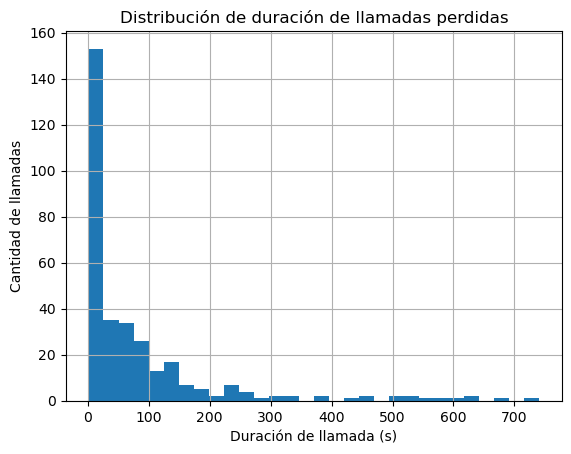

In [25]:
# Revisamos la distribución de duración de llamadas perdidas 

lost_calls_w_duration['call_duration'].hist(bins=30)
plt.xlabel('Duración de llamada (s)')
plt.ylabel('Cantidad de llamadas')
plt.title('Distribución de duración de llamadas perdidas')
plt.show()

In [26]:
# Normalizaremos a 0 las llamadas perdidas con duración pequeña (<=5s)
data.loc[(data['is_missed_call'] == 1) & (data['call_duration'] <= 5), 'call_duration'] = 0

# Y eliminaremos anomalías graves (duración >5s para llamadas perdidas)
data = data.drop(data[(data['is_missed_call'] == 1) & (data['call_duration'] > 5)].index)


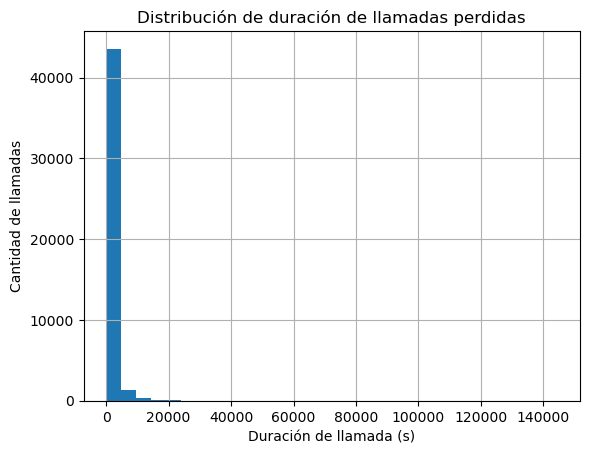

In [27]:
# Revisamos la distribución de duración de llamadas perdidas 

data['call_duration'].hist(bins=30)
plt.xlabel('Duración de llamada (s)')
plt.ylabel('Cantidad de llamadas')
plt.title('Distribución de duración de llamadas perdidas')
plt.show()

## Enriquecimiento de datos

In [28]:
data['waiting_time'] = data['total_call_duration'] - data['call_duration']

daily_operator_stats = data.groupby(['operator_id', 'date']).agg(
    total_calls=('calls_count', 'sum'),
    missed_call_rate=('is_missed_call', 'mean'),
    avg_total_call_duration=('total_call_duration', 'mean'),
    avg_call_duration=('call_duration', 'mean'),
    avg_waiting_time=('waiting_time', 'mean'),
    outgoing_calls=('direction_out', 'sum')
).reset_index()
daily_operator_stats.head()

,operator_id,date,total_calls,missed_call_rate,avg_total_call_duration,avg_call_duration,avg_waiting_time,outgoing_calls
0,879896,2019-08-02 00:00:00+03:00,13,0.333333,95.000000,10.333333,84.666667,3
1,879896,2019-08-03 00:00:00+03:00,11,0.333333,105.666667,18.000000,87.666667,2
2,879896,2019-08-04 00:00:00+03:00,2,0.500000,70.000000,57.000000,13.000000,2
3,879896,2019-08-05 00:00:00+03:00,29,0.250000,539.250000,477.250000,62.000000,3
4,879896,2019-08-06 00:00:00+03:00,87,0.333333,1707.666667,1546.500000,161.166667,5


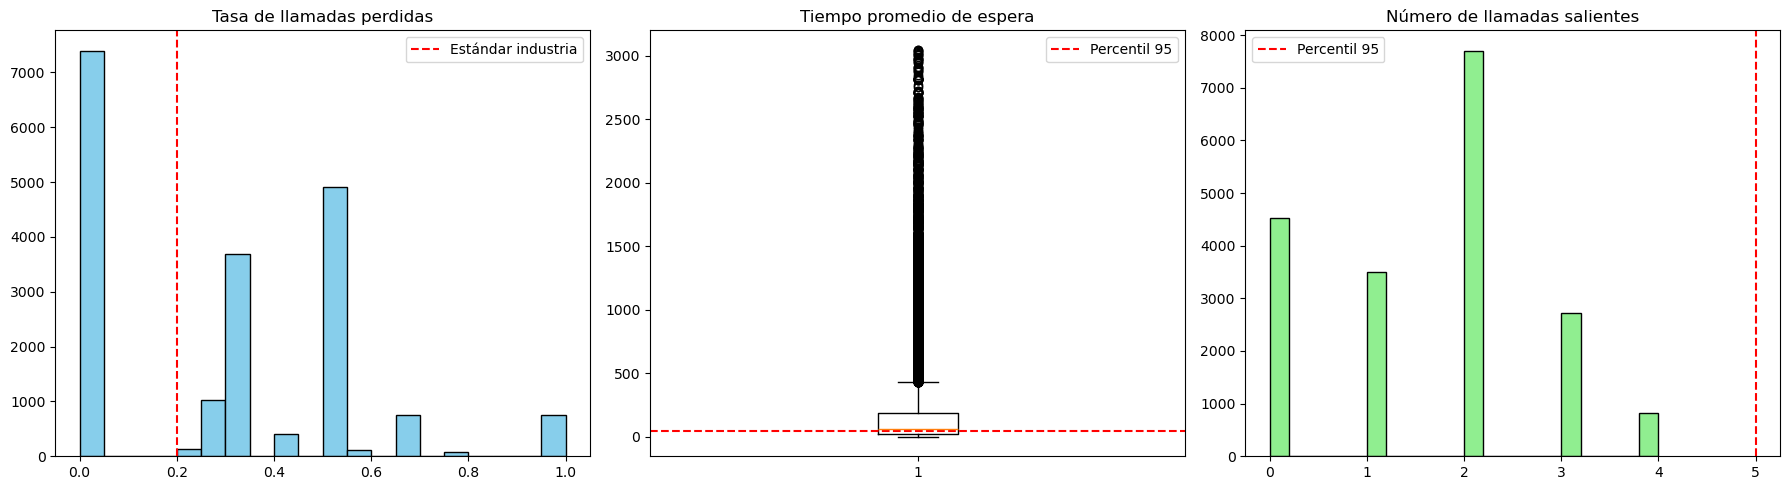

In [29]:
# Calcular percentiles de corte
waiting_99 = daily_operator_stats['avg_waiting_time'].quantile(0.99)
out_calls_95 = daily_operator_stats['outgoing_calls'].quantile(0.95)

# Crear tabla filtrada para gráficos (sin modificar el dataframe original)
operator_stats_clean = daily_operator_stats[
    (daily_operator_stats['avg_waiting_time'] <= waiting_99) &
    (daily_operator_stats['outgoing_calls'] <= out_calls_95)
]

# Ahora podemos graficar usando esta tabla limpia
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Histograma de missed_call_rate
axs[0].hist(operator_stats_clean['missed_call_rate'], bins=20, color='skyblue', edgecolor='black')
axs[0].axvline(0.2, color='red', linestyle='--', label='Estándar industria')
axs[0].set_title('Tasa de llamadas perdidas')
axs[0].legend()

# Boxplot de avg_waiting_time
axs[1].boxplot(operator_stats_clean['avg_waiting_time'], vert=True)
axs[1].axhline(45, color='red', linestyle='--', label='Percentil 95')
axs[1].set_title('Tiempo promedio de espera')
axs[1].legend()

# Histograma de outgoing_calls
axs[2].hist(operator_stats_clean['outgoing_calls'], bins=20, color='lightgreen', edgecolor='black')
axs[2].axvline(5, color='red', linestyle='--', label='Percentil 95')
axs[2].set_title('Número de llamadas salientes')
axs[2].legend()

plt.tight_layout()
plt.show()


Pasado

In [30]:
# Calcular total de llamadas por operador
operator_stats = (
    data.groupby(data.operator_id, as_index=False)
    .agg({'calls_count': 'sum'})
    .rename(columns={'calls_count': 'total_calls'})
    )
operator_stats.sample(5)

,operator_id,total_calls
1025,960620,143
1067,969284,1
405,917378,17
864,945710,1
174,899972,195


In [31]:
# Calcular procentaje de llamadas perdidas

missed_calls = (
    data.groupby(data.operator_id, as_index=False)
    .agg({'is_missed_call': lambda x: x.mean() * 100}).round(2)
    .rename(columns={'is_missed_call': 'missed_call_rate'})
)

operator_stats = operator_stats.merge(missed_calls, on='operator_id', how='left')
operator_stats

,operator_id,total_calls,missed_call_rate
0,879896,1131,39.06
1,879898,7973,40.00
2,880020,54,31.82
3,880022,219,43.42
4,880026,2439,47.47
...,...,...,...
1087,972410,77,50.00
1088,972412,61,40.00
1089,972460,70,33.33
1090,973120,3,50.00


In [32]:
# Calcular duraciones de llamadas

duration_rate = (
    data.groupby('operator_id', as_index = False)
    .agg({'total_call_duration': 'mean', 
          'call_duration': 'mean' })
    .rename(columns={
        'total_call_duration': 'avg_total_call_duration',
        'call_duration': 'avg_call_duration'
    })
)
operator_stats = operator_stats.merge(duration_rate, on='operator_id', how='left')

# Duración de tiempo de espera
operator_stats['avg_waiting_time'] = operator_stats.avg_total_call_duration - operator_stats.avg_call_duration

In [33]:
operator_stats.head()

,operator_id,total_calls,missed_call_rate,avg_total_call_duration,avg_call_duration,avg_waiting_time
0,879896,1131,39.06,761.148438,650.476562,110.671875
1,879898,7973,40.00,1567.364000,1115.504000,451.860000
2,880020,54,31.82,119.272727,104.090909,15.181818
3,880022,219,43.42,298.407895,240.842105,57.565789
4,880026,2439,47.47,978.111111,856.939394,121.171717


In [34]:
# Revisamos llamadas salientes

out_calls = (
    data.query('direction_in == True')
    .groupby('operator_id')['calls_count'].sum()
    .reset_index(name = 'outgoing_calls')
)

# Se agregan a nuestro operator_stats
operator_stats = operator_stats.merge(out_calls, on = 'operator_id', how='left')

In [36]:
# Remplazamos los valores NaN en outgoing_calls por 0 y convertimos a tipo int

operator_stats['outgoing_calls'] = operator_stats['outgoing_calls'].fillna(0).astype(int)


Calcularemos el porcentaje de llamadas salientes por día para cada operador. Así podremos ver el rendimiento de cada uno y decidir si su promedio de llamadas salientes es eficiente

In [46]:
# Calcular el número de días activos por operador
dias_por_operador = data.groupby('operator_id')['date'].nunique().reset_index(name='active_days')

# Unir esa info a operator_stats
operator_stats = operator_stats.merge(dias_por_operador, on='operator_id', how='left')

# Calcular el promedio de llamadas salientes por día activo
operator_stats['avg_outgoing_per_day'] = (
    operator_stats['outgoing_calls'] / operator_stats['active_days']
).round(2)


In [57]:
operator_stats.sample(5)

,operator_id,total_calls,missed_call_rate,avg_total_call_duration,avg_call_duration,avg_waiting_time,outgoing_calls,active_days,avg_outgoing_per_day
827,944474,19,37.50,67.000000,20.125000,46.875000,6,4,1.50
936,951508,468,25.00,651.044118,538.852941,112.191176,315,19,16.58
1077,970250,1,100.00,8.000000,0.000000,8.000000,0,1,0.00
1021,959312,214,26.47,443.794118,388.147059,55.647059,58,12,4.83
81,891646,8,0.00,53.285714,29.857143,23.428571,8,7,1.14


Teniendo limpios nuestros datos y habiendo enriquecido nuestras tablas con valores nuevos, podemos pasar al Análisis exploratorio.

## Análisis exploratorio

Haciendo un resumen estadístico, podremos ver
- missed_call_rate: Quiénes tienen tasas muy altas de llamadas perdidas
- avg_waiting_time: Operadores con tiempos de espera excesivos
- avg_outgoing_per_day: Operadores con pocas llamadas salientes

In [66]:
# Resumen estadístico de columnas relevantes

summary = operator_stats[['missed_call_rate', 'avg_waiting_time', 'avg_outgoing_per_day']].describe().round(2)
print(summary)


       missed_call_rate  avg_waiting_time  avg_outgoing_per_day
count           1092.00           1092.00               1092.00
mean              31.13            216.06                  3.28
std               23.18            505.17                 10.13
min                0.00              0.00                  0.00
25%               12.42             23.00                  0.00
50%               33.33             46.37                  1.00
75%               46.15            157.74                  2.31
max              100.00           5907.51                158.08


- missed_call_rate: Hay un grupo importante con desempeño muy deficiente (más del 40 % de pérdidas sería preocupante).

- avg_waiting_time: Hay una minoría de operadores con tiempos anómalamente altos. Conviene graficar con eje limitado o usar logaritmo para ver la tendencia real.

- outgoing_calls: Comportamiento muy desigual, 
pocos operadores parecen encargarse de la mayoría de las llamadas salientes.

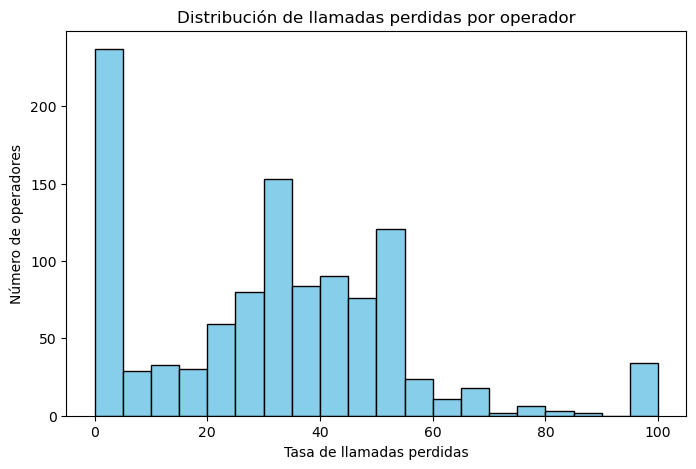

In [67]:
# Histograma missed_call_rate

plt.figure(figsize=(8,5))
plt.hist(operator_stats['missed_call_rate'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de llamadas perdidas por operador')
plt.xlabel('Tasa de llamadas perdidas')
plt.ylabel('Número de operadores')
plt.show()


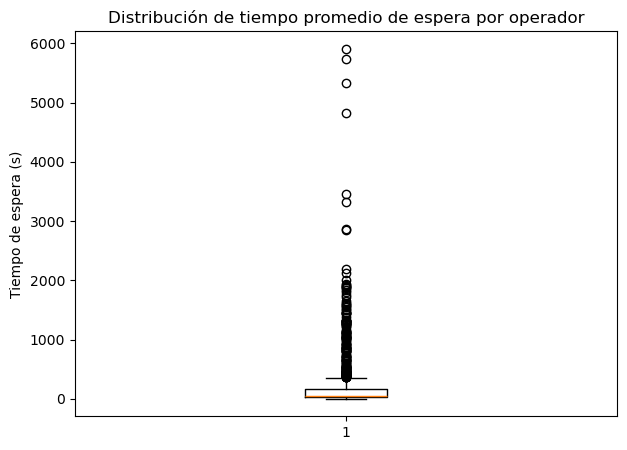

In [86]:
# Boxplot de avg_waiting_time
plt.figure(figsize=(7,5))
plt.boxplot(operator_stats['avg_waiting_time'], vert=True)
plt.title('Distribución de tiempo promedio de espera por operador')
plt.ylabel('Tiempo de espera (s)')
plt.show()

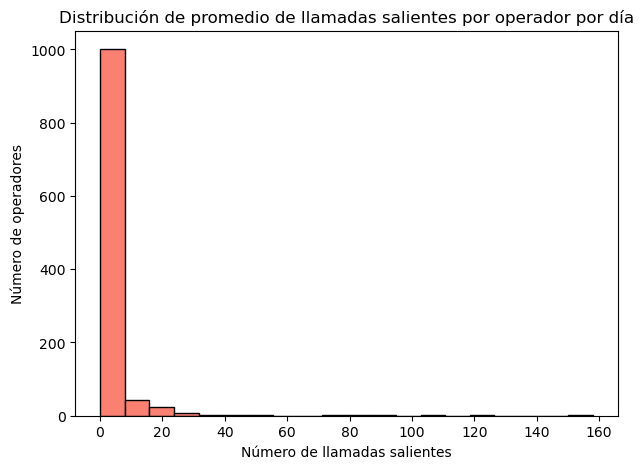

In [87]:
# Histograma de outgoing_calls
plt.figure(figsize=(7,5))
plt.hist(operator_stats['avg_outgoing_per_day'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribución de promedio de llamadas salientes por operador por día')
plt.xlabel('Número de llamadas salientes')
plt.ylabel('Número de operadores')
plt.show()

Aplicaremos un recorte a los percetiles 95-99 para eliminar valores atípicos extremos en las variables de tiempo de espera y llamadas salientes, dado que distorsionaban la distribución general. Este procedimiento mantiene el 99% de los datos reales sin afectar las conclusiones.

In [79]:
# Calcular percentiles para analizar outliers
percentiles = operator_stats[['avg_waiting_time', 'avg_outgoing_per_day']].quantile([0.95, 0.99])
percentiles


,avg_waiting_time,avg_outgoing_per_day
0.95,1127.366054,13.0045
0.99,1935.694780,43.1268


In [95]:
# calcular percentiles
waiting_95 = operator_stats['avg_waiting_time'].quantile(0.95)
outgoing_95 = operator_stats['avg_outgoing_per_day'].quantile(0.95)

# crear subset filtrado
operator_clean = operator_stats[
    (operator_stats["avg_waiting_time"] <= waiting_95) &
    (operator_stats["avg_outgoing_per_day"] <= outgoing_95)
]

Volveremos a graficar nuestros datos, ya sin los outliers y agregando una marca, que según artículos de la industria, serían los tiempo standar para conciderar que se está dando un buen servicio en telecomunicaciones.

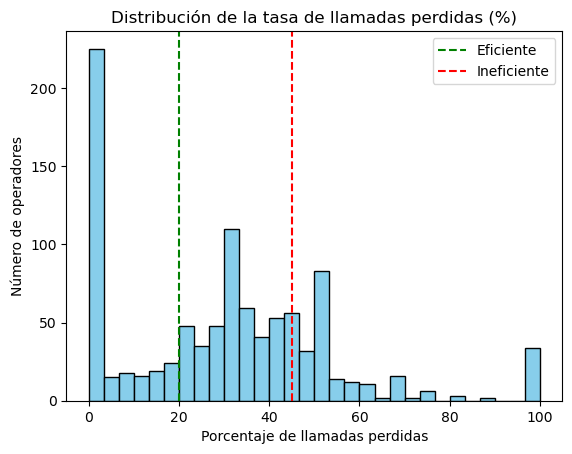

In [96]:
# Distribución de tasa de llamadas perdidas

plt.hist(operator_clean["missed_call_rate"], bins=30, color='skyblue', edgecolor='black')
plt.axvline(20, color='green', linestyle='--', label='Eficiente')
plt.axvline(45, color='red', linestyle='--', label='Ineficiente')
plt.title('Distribución de la tasa de llamadas perdidas (%)')
plt.xlabel('Porcentaje de llamadas perdidas')
plt.ylabel('Número de operadores')
plt.legend()
plt.show()


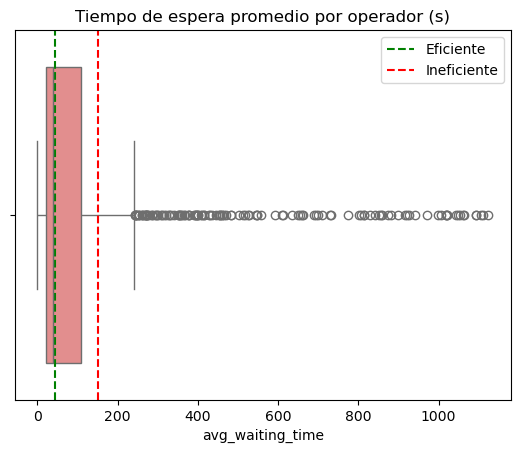

In [97]:
#Tiempo de espera promedio por operador (s)

sns.boxplot(x=operator_clean["avg_waiting_time"], color='lightcoral')
plt.axvline(45, color='green', linestyle='--', label='Eficiente')
plt.axvline(150, color='red', linestyle='--', label='Ineficiente')
plt.title('Tiempo de espera promedio por operador (s)')
plt.legend()
plt.show()


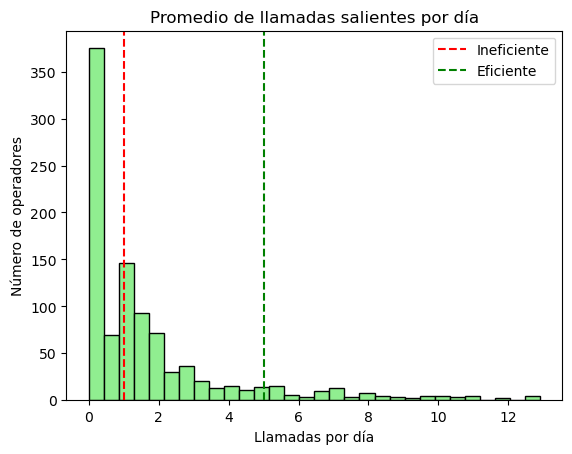

In [98]:
# Promedio de llamadas salientes por día

plt.hist(operator_clean["avg_outgoing_per_day"], bins=30, color='lightgreen', edgecolor='black')
plt.axvline(1, color='red', linestyle='--', label='Ineficiente')
plt.axvline(5, color='green', linestyle='--', label='Eficiente')
plt.title('Promedio de llamadas salientes por día')
plt.xlabel('Llamadas por día')
plt.ylabel('Número de operadores')
plt.legend()
plt.show()


- Tasa de llamadas perdidas: más de la mitad de los operadores superan el 20%, entonces hay un problema generalizado con las llamadas entrantes.

- Tiempo de espera promedio: muchísimos operadores superan el percentil 99 que definimos como estándar (45 s), lo que indica que la espera para los clientes es un cuello de botella real.

- Promedio de llamadas salientes: Comportamiento muy desigual, pocos operadores parecen encargarse de la mayoría de las llamadas salientes.